In [164]:
from copy import deepcopy
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 5)

# linestyles for graphics
line_styles = [
    'solid',
    'dotted',
    'dashdot'
]

# colors for graphics
line_colors = [
    'darkgreen',
    'darkcyan',
    'chocolate',
]

In [148]:
sql_query_get_avg_min = """
    select
        s.algorithm_name as name,
        s.iteration as iteration,
        avg(s.minimum) as avg_minimum
    from statistics s
    group by 
        s.algorithm_name, s.iteration
    ;
    """

In [149]:
sql_query_get_avg_qualities = """
    select
        q.algorithm_name as name,
        q.iteration as iteration,
        avg(quality) as avg_quality
    from qualities q
    group by
        q.algorithm_name, q.iteration 
    ;
    """

In [150]:
import sqlite3

In [151]:
db = sqlite3.connect('coevolution.db')
cursor = db.cursor()

res = cursor.execute(sql_query_get_avg_min)
minimum_metrics = res.fetchall()
db.commit()

res = cursor.execute(sql_query_get_avg_qualities)
qualities_metrics = res.fetchall()
db.commit()

db.close()

### Qualities

In [152]:
qualities_metrics = sorted(qualities_metrics)
quality_dict = {}
for metric in qualities_metrics:
    if 'sep' in metric[0]:
        continue
    if quality_dict.get(metric[0]):
        quality_dict[metric[0]].append(metric[2])
    else:
        quality_dict[metric[0]] = [metric[2]]

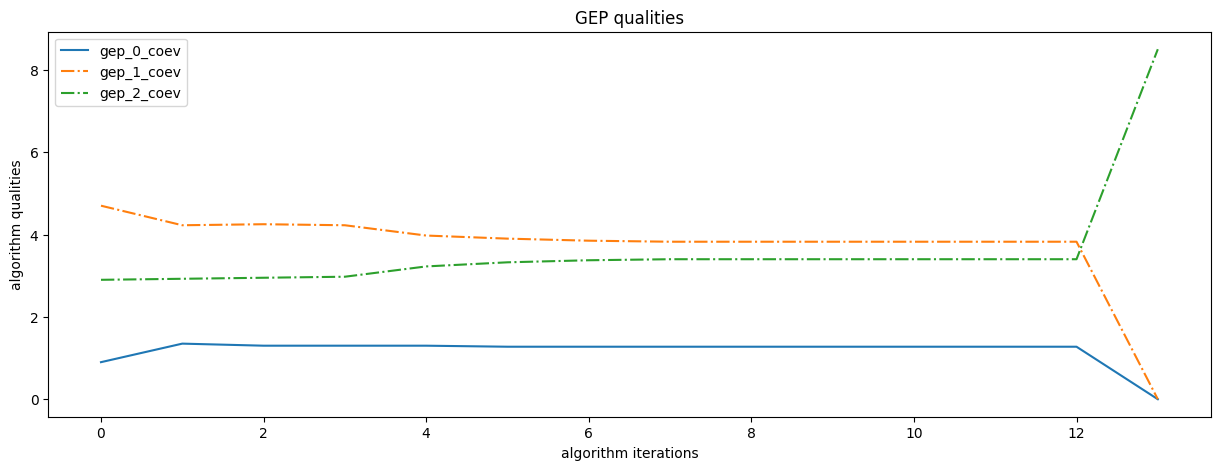

In [153]:
for alg in quality_dict.keys():
    plt.plot(
        quality_dict[alg], 
        label=alg, 
        linestyle=random.choice(line_styles)
    )
    
    plt.title('GEP qualities')
    plt.legend(loc="best")
    plt.xlabel('algorithm iterations')
    plt.ylabel('algorithm qualities')
plt.show()

### Minimums

In [154]:
minimum_metrics = sorted(minimum_metrics)
minimum_dict = {}
minimum_y = None
minimum_alg = None
coev_len = 0
for metric in minimum_metrics:
    
    if 'coev' in metric[0]:
        if metric[1] > coev_len:
            coev_len = metric[1]
    
    _minimum = metric[2]*1_000_000
    
    if minimum_dict.get(metric[0]):
        minimum_dict[metric[0]].append(_minimum)
    else:
        minimum_dict[metric[0]] = [_minimum]
        
    if minimum_y:
        if _minimum < minimum_y:
            minimum_alg = metric[0]
            minimum_y = _minimum
    else:
        minimum_alg = metric[0]
        minimum_y = _minimum

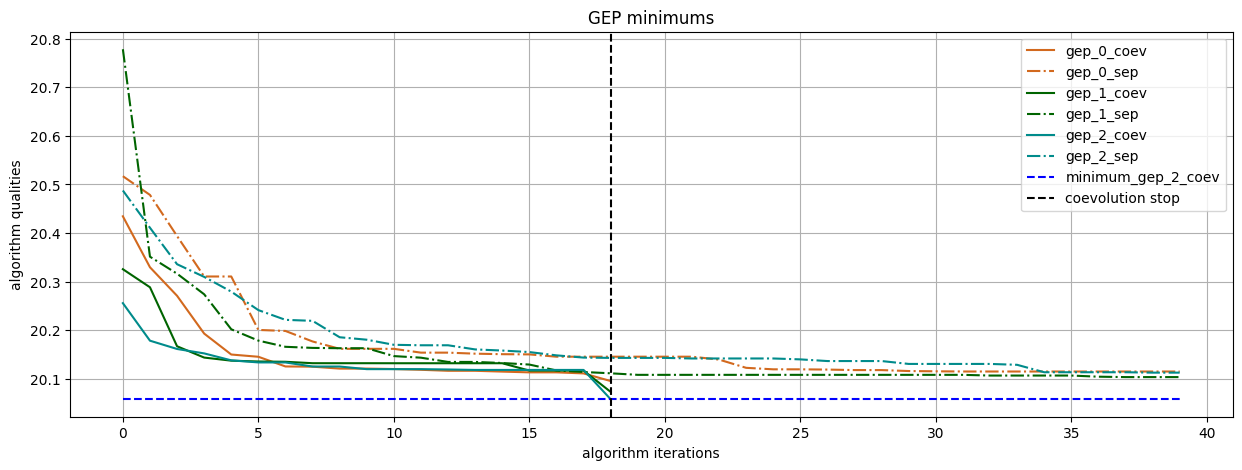

In [166]:
_line_colors = deepcopy(line_colors)
_current_color = None
_current_color_counter = 0

for alg in minimum_dict.keys():
    
    if _current_color_counter == 2:
        _current_color = None
        _current_color_counter = 0
    
    if _current_color is None:
        _current_color = random.choice(line_colors)
    
    if 'coev' in alg:
        linestyle = 'solid'
    else:
        linestyle = 'dashdot'
    plt.plot(
        minimum_dict[alg], 
        label=alg, 
        linestyle=linestyle,
        color=_current_color
    )
    plt.title('GEP minimums')
    plt.xlabel('algorithm iterations')
    plt.ylabel('algorithm qualities')
    
    _current_color_counter += 1
    
plt.plot(
    list(range(max_len)), 
    [minimum_y] * max_len, 
    linestyle='dashed', 
    c='b', 
    label=f'minimum_{minimum_alg}'
)
plt.axvline(
    coev_len-1, 
    c='black', 
    linestyle='dashed', 
    label='coevolution stop'
)

plt.legend(loc="best")
plt.grid()
plt.show()